In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from tqdm import tqdm_notebook

from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

import torch

In [ ]:
from wordcloud import WordCloud

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df = pd.read_pickle('../dataset/john_wick_4.p')
df.head()

,review,label
0,This was just like watching my nephew play a v...,0
1,Where do I start ? After fighting & killing ab...,0
2,After the hundredth henchman fails to shoot Jo...,0
3,It's nothing but overstylised overdone action ...,0
4,I am absolutely baffled by the 8.4 rating on h...,0


In [ ]:
len(df)

150

In [ ]:
bad_reviews = df['review'][df['label']==0].to_list()
good_reviews = df['review'][df['label']==1].to_list()

In [ ]:
def remove_stopwords(sentence):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(sentence)
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    filtered_sentence = ' '.join(filtered_tokens)
    return filtered_sentence

for i in tqdm_notebook(range(len(bad_reviews))):
    bad_reviews[i] = remove_stopwords(bad_reviews[i])

for i in tqdm_notebook(range(len(good_reviews))):
    good_reviews[i] = remove_stopwords(good_reviews[i])

/tmp/ipykernel_19745/161755455.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(bad_reviews))):


  0%|          | 0/75 [00:00<?, ?it/s]

/tmp/ipykernel_19745/161755455.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(good_reviews))):


  0%|          | 0/75 [00:00<?, ?it/s]

In [ ]:
bad_review_data = ''
for br in bad_reviews:
    bad_review_data = bad_review_data + ' ' + br

good_review_data = ''
for gr in good_reviews:
    good_review_data = good_review_data + ' ' + gr

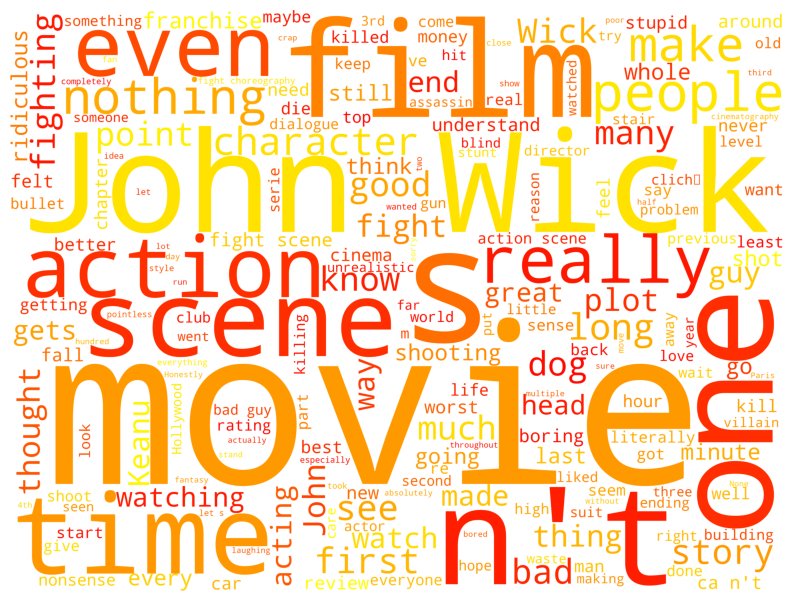

In [ ]:
wordcloud = WordCloud(background_color ='white', colormap='autumn',
                      width = 4000, height = 3000, random_state = 43).generate(bad_review_data)

plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

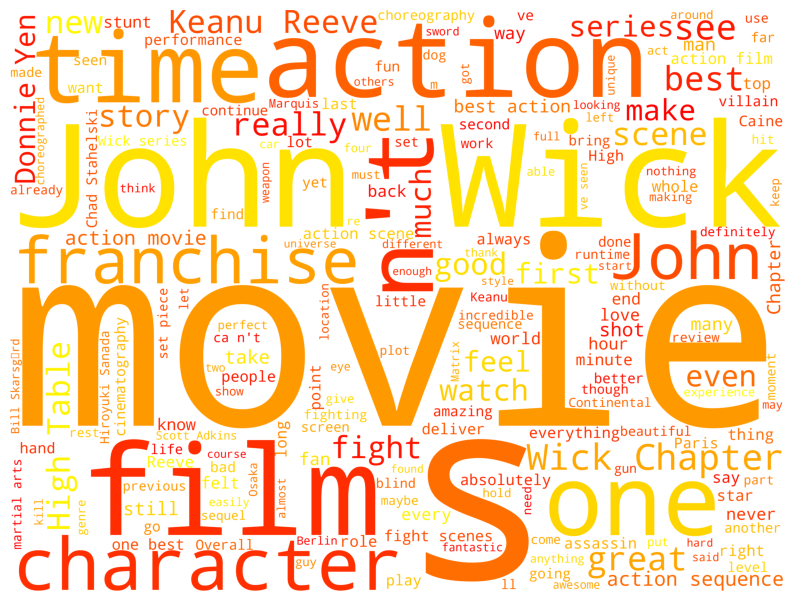

In [ ]:
wordcloud = WordCloud(background_color ='white', colormap='autumn',
                      width = 4000, height = 3000, random_state = 43).generate(good_review_data)

plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()